In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from specim_test.specim.specfuncs import spec2d
from specim.specfuncs import spec1d
from astropy.io import fits as pf
from scipy import interpolate

In [2]:
file_loc = 'B0631_spectra/*'

In [3]:
file_list = []
out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'cleaned' in p and 'B0631' in p:

        file_list.append(p)
        frame = p.split('_')[-3][:4]
        out_file.append('B0631_r'+ frame + '_spec1d.fits')

In [4]:
file_list

['B0631_spectra/B0631_r0042_cleaned.fits',
 'B0631_spectra/B0631_r0040_cleaned.fits',
 'B0631_spectra/B0631_r0041_cleaned.fits']


Loading file B0631_spectra/B0631_r0040_cleaned.fits
-----------------------------------------------
Read in 2-dimensional spectrum from B0631_spectra/B0631_r0040_cleaned.fits (HDU=1)
The input dataset was trimmed
 xrange: 25:136.  yrange: 0:4096
Final data dimensions (x y): 111 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 111

Found 1 NaNs in the two-dimensional spectrum

Loading file B0631_spectra/B0631_r0041_cleaned.fits
-----------------------------------------------
Read in 2-dimensional spectrum from B0631_spectra/B0631_r0041_cleaned.fits (HDU=1)
The input dataset was trimmed
 xrange: 25:136.  yrange: 0:4096
Final data dimensions (x y): 111 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 111

Found 1 NaNs in the two-dimensional spectrum

Loading file B0631_spectra/B0631_r0042_cleaned.fits
-----------------------------------------------
Read in 2-dimensional spectrum from B0631_spectra/B0631_r0042_cleaned.fits (HDU=1)
The input da

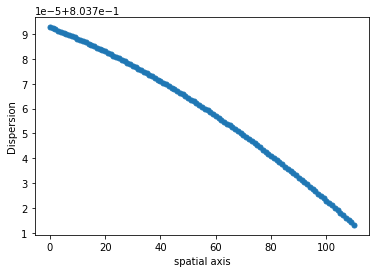

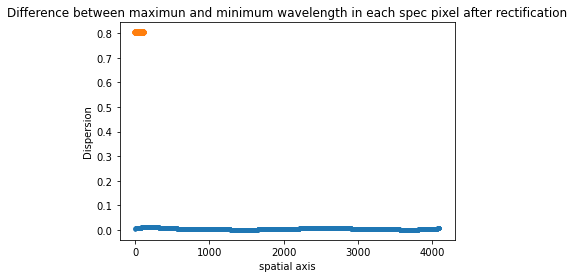

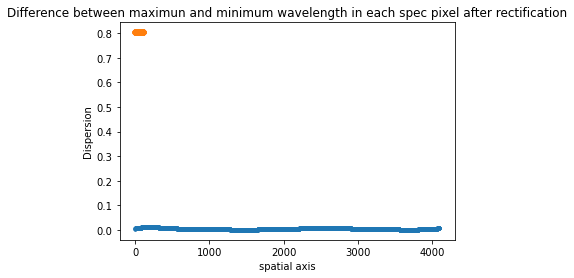

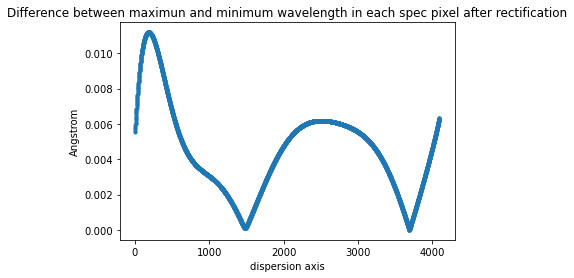

In [5]:
#the exposure time is different for three frames
spec1 = spec2d.Spec2d(file_list[1], hext=1, varext=2, xtrim=[25, 135])
spec2 = spec2d.Spec2d(file_list[2], hext=1, varext=2, xtrim=[25, 135])
spec3 = spec2d.Spec2d(file_list[0], hext=1, varext=2, xtrim=[25, 135])

spec_list = [spec1, spec2, spec3]

for sp in spec_list:
    sp.set_dispaxis('y')
    sp.do_waverect(doplot=True, resamp_ord=1)

### It seems there are three object in the spectra. The brightest one is a star spectra and also it's adjacent one. The lens spectra is the one on the left.

### After wave rectification the new wav2d data is different for different frames. That's why may be it's best to extract 1d spectra from each 2d frame and then resample them to a common wavelength array and coadd them.

Profile max value (before normalization) 30.719849


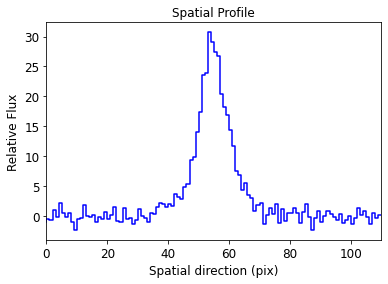


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 1

Now enter constants of the background polynomial upto degree 0
c0 : 0.5

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 28, 56, 3, 4

amplitude=28.000000, x_0=56.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Polynomial1D(0, c0=-0.23824082)>

    [1]: <Moffat1D(amplitude=29.38854058, x_0=55.22494415, gamma=7.47157016, alpha=1.76741842)>
Parameters:
            c0_0           amplitude_1     ...      gamma_1           alpha_1      
    ------------------- ------------------ ... ----------------- ------------------


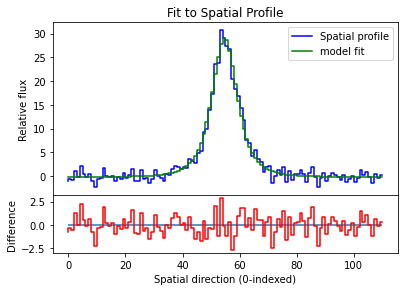

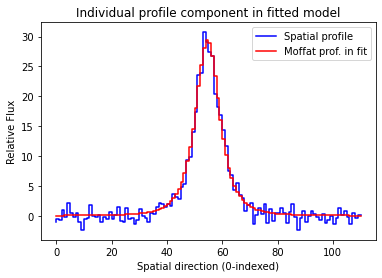


Do you want to start over ? : type yes/no
no
Profile max value (before normalization) 41.703819


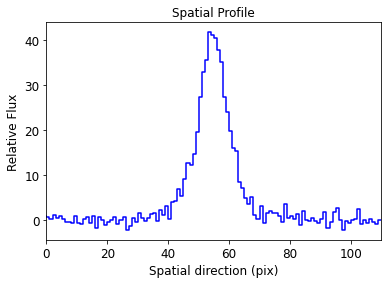


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 1

Now enter constants of the background polynomial upto degree 0
c0 : 0.5

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 40, 56, 3, 4

amplitude=40.000000, x_0=56.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Polynomial1D(0, c0=0.02419031)>

    [1]: <Moffat1D(amplitude=41.68082245, x_0=55.26781947, gamma=8.7202409, alpha=2.1407815)>
Parameters:
            c0_0            amplitude_1     ...     gamma_1           alpha_1      
    -------------------- ------------------ ... ---------------- ------------------
   

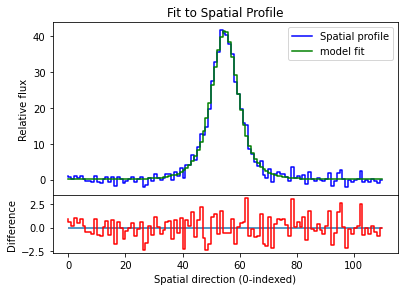

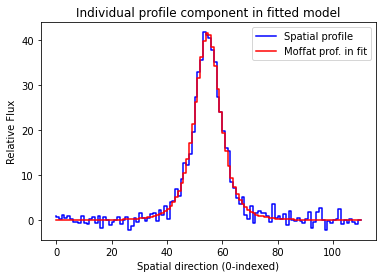


Do you want to start over ? : type yes/no
no
Profile max value (before normalization) 46.422180


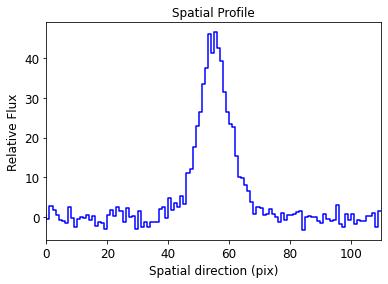


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 1

Now enter constants of the background polynomial upto degree 0
c0 : 0.5

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 43, 56, 3, 4

amplitude=43.000000, x_0=56.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Polynomial1D(0, c0=-0.2096977)>

    [1]: <Moffat1D(amplitude=45.07619278, x_0=55.6460028, gamma=11.13985225, alpha=3.09678107)>
Parameters:
            c0_0           amplitude_1    ...      gamma_1            alpha_1      
    ------------------- ----------------- ... ------------------ ------------------
 

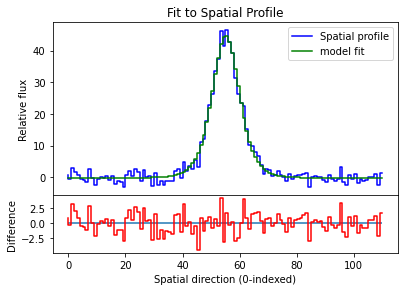

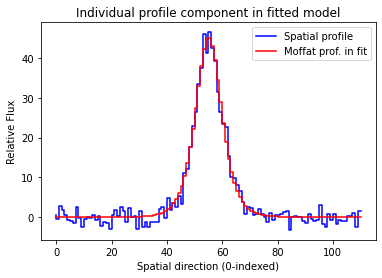


Do you want to start over ? : type yes/no
no


In [11]:
#%matplotlib notebook
for sp in spec_list:
    sp.spatial_profile(pixrange=[1900, 2100])
    plt.show()
    sp.initial_model()

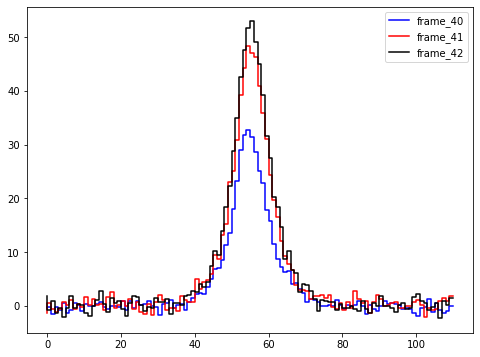

In [17]:
plt.figure(figsize=(8, 6))
color = ['b', 'r', 'k']
label = ['frame_40', 'frame_41', 'frame_42']

for i, sp in enumerate(spec_list):
    tmpdata = sp.data[2100:2400, :]
    pflux = np.median(tmpdata, axis=0)
    x = np.arange(sp.data.shape[1])
    plt.plot(x, pflux, color=color[i], drawstyle='steps', label=label[i])
    plt.legend()

In [36]:
wtsp = np.zeros(spec1.data[1:, :].shape) 
wtsum = np.zeros(spec1.data[1:, :].shape)

for sp in spec_list:
    s = sp.data[1:, :]  # to get rid of all the nans due to wave rectification
    v = sp.vardata[1:, :]
    wt = np.zeros(wtsp.shape)
    mask = np.isnan(v) | (v<=0)
    wt[~mask] = 1.0 / v[~mask]
    #print(sum(sum(np.isnan(wt) | (wt<=0))))
    wtsp += wt * s
    #print(sum(sum(wtsp==0)))
    wtsum += wt
    #print(sum(sum(wtsum==0)))

wtsp[wtsum == 0] = 0
wtsum[wtsum == 0] = 1
outsp = wtsp / wtsum
outvar = 1.0 / wtsum

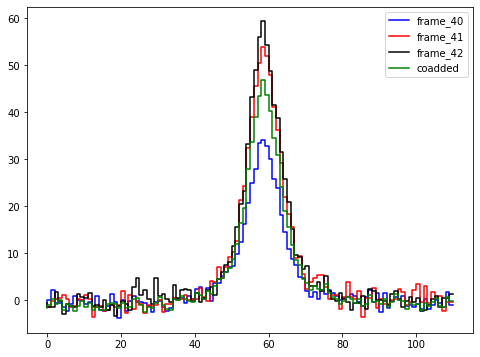

In [56]:
plt.figure(figsize=(8, 6))
color = ['b', 'r', 'k']
label = ['frame_40', 'frame_41', 'frame_42']

for i, sp in enumerate(spec_list):
    data = sp.data[1:, :]
    tmpdata = data[3600:3800, :]
    pflux = np.median(tmpdata, axis=0)
    x = np.arange(data.shape[1])
    plt.plot(x, pflux, color=color[i], drawstyle='steps', label=label[i])
    plt.legend()

tmpdata = outsp[3600:3800, ]
pflux = np.median(tmpdata, axis=0)
plt.plot(x, pflux, color='g', drawstyle='steps', label='coadded')
plt.legend()